## Question correlations

In this notebook we're trying to understand teh impact of questions on each other. This stems from the realisation, that the `CPR Generation Policy` question in part relates to the `faithfulness` questions: the rule about not responding when there's not enough information in the sources can in fact correlate with those cases where annotators find hallucinations.

To understand this, looking at the correlations of the two responses.

In [27]:
import sys
import os
import pandas as pd
import argilla as rg
import seaborn as sns
import matplotlib.pyplot as plt
from itertools import chain
from pathlib import Path
from dotenv import load_dotenv, find_dotenv

sys.path.append(Path("../../").absolute().as_posix())

from src.evaluation.human import argilla_to_scores

load_dotenv(find_dotenv())
rg.init(api_url="https://argilla.labs.climatepolicyradar.org/", api_key=os.environ["ARGILLA_KEY"])

/Users/matyasjuhasz/git/rag-labs/.venv/lib/python3.11/site-packages/argilla/client/client.py:178: UserWarning: No workspace configuration was detected. To work with Argilla datasets, specify a valid workspace name on `rg.init` or set it up through the `rg.set_workspace` function.
  warnings.warn(
/Users/matyasjuhasz/git/rag-labs/.venv/lib/python3.11/site-packages/argilla/client/client.py:195: UserWarning: You're connecting to Argilla Server 1.26.1 using a different client version (1.29.0).
This may lead to potential compatibility issues during your experience.
To ensure a seamless and optimized connection, we highly recommend aligning your client version with the server version.
  warnings.warn(


In [2]:
users = rg.User.list()

In [22]:
feedback_from_hf = rg.FeedbackDataset.from_huggingface(
    "ClimatePolicyRadar/annotation-responses-unece"
)

argilla.yaml:   0%|          | 0.00/3.85k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1700 [00:00<?, ? examples/s]

Parsing records: 100%|██████████| 1700/1700 [00:25<00:00, 65.47it/s]


In [23]:
ids_in_ds = set(chain.from_iterable([[str(r.user_id) for r in rec.responses] for rec in feedback_from_hf.records if rec.responses]))
ids_to_user = {str(u.id): u.username for u in users if str(u.id) in ids_in_ds}
users_to_ids = {v: k for k, v in ids_to_user.items()}

In [24]:
scores = argilla_to_scores(feedback_from_hf, "average", ["overall-quality", "cpr-generation-policy", "faithfulness", "system-responds", "should-have-responded", "relevance", "coherence_fluency", "toxicity", "cpr-formatting-guidelines"])

[07/11/24 15:17:58] INFO     Filtered dataset by removing 2 rows with missing values                    ]8;id=117839;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=869339;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

[07/11/24 15:17:58] INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=249810;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=863961;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 2 rows with missing values                                                   

                    INFO     Filtered dataset by removing 95 rows with missing values                   ]8;id=565911;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=329340;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=455871;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=351909;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 95 rows with missing values                                                  

                    INFO     Filtered dataset by removing 752 rows with missing values                  ]8;id=499362;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=154436;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=590142;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=85901;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 752 rows with missing values                                                 

                    INFO     Filtered dataset by removing 30 rows with missing values                   ]8;id=27650;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=372553;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=466259;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=750783;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 30 rows with missing values                                                  

                    INFO     Filtered dataset by removing 238 rows with missing values                  ]8;id=440741;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=656589;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=218801;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=160420;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 238 rows with missing values                                                 

                    INFO     Filtered dataset by removing 543 rows with missing values                  ]8;id=664112;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=329809;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=672758;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=612104;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 543 rows with missing values                                                 

                    INFO     Filtered dataset by removing 624 rows with missing values                  ]8;id=729456;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=966957;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=166380;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=427683;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 624 rows with missing values                                                 

                    INFO     Filtered dataset by removing 19 rows with missing values                   ]8;id=209834;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=598390;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=528571;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=490548;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 19 rows with missing values                                                  

                    INFO     Filtered dataset by removing 46 rows with missing values                   ]8;id=591286;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=330508;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\

                    INFO     INFO:src.dataset_creation.annotation_dashboard.utils:Filtered dataset by   ]8;id=906928;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py\utils.py]8;;\:]8;id=788465;file:///Users/matyasjuhasz/git/rag-labs/notebooks/dataset-generation/../../src/dataset_creation/annotation_dashboard/utils.py#57\57]8;;\
                             removing 46 rows with missing values                                                  

In [25]:
scores_df = pd.DataFrame([score.__dict__ for score in scores])

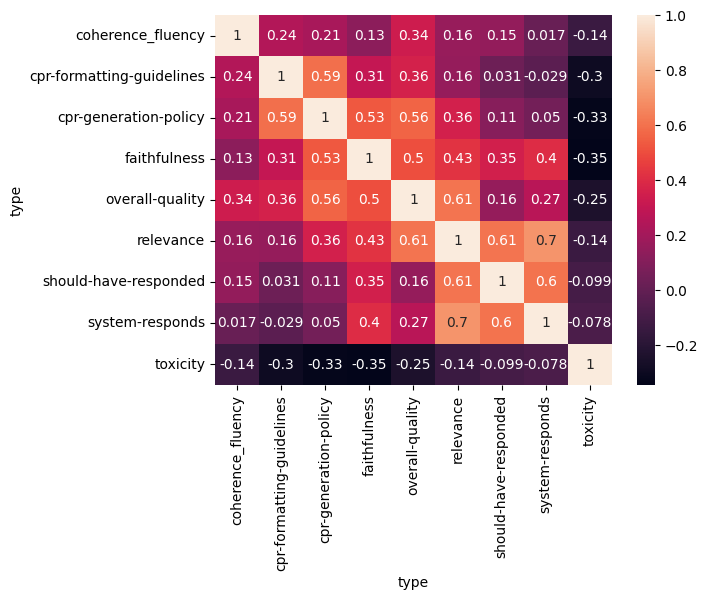

In [28]:
sns.heatmap(scores_df.pivot(index="gen_uuid", columns="type", values="score").corr(), annot=True)
plt.show()

### Analysing the results
There are a few things jumping out on this. 
- formatting and general guidlines move together (0.59): this is expected -- if the answer breaks the guidance, it is likely it'll also break it from a formatting perspective
- `overall-quality` is highest correlated with `relevance` (0.61), `faithfulness` (0.5) and `cpr-generation-policy` (0.56), negatively with `toxicity` (0.25): this is also expected, the fact that the overall quality is some combination of these aspects of the response, is sensible. Worth highlighting, that higher correlations would have been a bad signal: meaning that one dimension skews the judgement of annotators, but this doesn't seem to be the case here. Interesting to note the close to zero correlation between `should-have-responded` and the quality, which means the annotators understood well that these are orthogonal, and that responses should be scored given the context they had access to.
- `faithfulness` and `cpr-generation-policy`: this was the initial driver for this analyis. The 0.53 correlation shows that there's significant alignment between these two. This supports the hypothesis that rule 2 (__"restrict its responses to queries that can be answered based on the document"__) has a disproportionate impact on the policy alignment question compared to the other 4 rules (which might be because this is the rule most easily broken).

### Wrong argilla config

At this point, realised that the Argilla config is wrong in Huggingface, and that's the reason for the `should-have-responded` question not coming through. 
Leaving the below logic for reproducibility reasons.

In [6]:
_tmp_argilla_ds = rg.FeedbackDataset.from_argilla(name="rag-evaluation-axes-unece-group-1-batch-5", workspace="carolina_coll")

In [20]:
from argilla.client.feedback.config import DatasetConfig
import yaml

def remove_client(d: dict) -> dict:
    for f in d.get("fields", []) + d.get("questions", []):
        f.pop("client", None)
    return d


cf = DatasetConfig(
    fields=_tmp_argilla_ds.fields,
    questions=_tmp_argilla_ds.questions,
    guidelines=_tmp_argilla_ds.guidelines,
    metadata_properties=_tmp_argilla_ds.metadata_properties or None,
    allow_extra_metadata=_tmp_argilla_ds.allow_extra_metadata,
    vectors_settings=_tmp_argilla_ds.vectors_settings or None,
).to_yaml()


# for some obscure reason, Argilla adds an empty client field, which then breaks
# the dataset creation when pulling from the Hub
filtered_cf = remove_client(yaml.safe_load(cf))


with open("../../src/dataset_creation/configs/huggingface/argilla.yaml", "w") as f:
    f.write(yaml.dump(filtered_cf))

In [21]:
from huggingface_hub import HfApi

HfApi().upload_file(
    path_or_fileobj="../../src/dataset_creation/configs/huggingface/argilla.yaml",
    path_in_repo="argilla.yaml",
    repo_id="ClimatePolicyRadar/annotation-responses-unece",
    repo_type="dataset",
    token=os.environ["HUGGINGFACE_TOKEN"],
)

CommitInfo(commit_url='https://huggingface.co/datasets/ClimatePolicyRadar/annotation-responses-unece/commit/74430fc103cdb608148b913576a0f37ee8258a0d', commit_message='Upload argilla.yaml with huggingface_hub', commit_description='', oid='74430fc103cdb608148b913576a0f37ee8258a0d', pr_url=None, pr_revision=None, pr_num=None)